# Name : Ahmed Gamal Hamid Zein 
# Ai Mansoura

# First, we import the libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('ggplot')

## functions for better visualization of the posterior plots.

In [3]:
def resizeplot():
    plt.figure(figsize=(12,6))

In [4]:
def resizecorr():
    plt.figure(figsize=(15,7))

# Load the data:

In [5]:
df=pd.read_csv('weather.csv')

In [6]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [7]:
data= df['RISK_MM']
data.tail(50)

316     0.0
317     9.8
318     1.6
319     3.4
320     0.0
321     0.0
322     0.0
323     0.0
324     0.0
325     0.0
326    17.4
327     0.0
328     0.0
329     0.0
330     0.0
331     0.0
332     0.0
333     0.0
334     0.0
335     0.0
336     0.0
337     7.6
338     3.0
339     0.0
340     8.2
341     0.0
342     0.0
343     0.0
344     0.0
345     0.0
346     0.0
347    13.2
348     0.6
349     0.0
350     0.0
351     0.0
352     0.0
353     0.2
354     0.0
355     0.8
356     0.0
357     0.0
358     0.0
359     0.0
360     0.0
361     0.0
362     0.0
363     0.0
364     0.0
365     0.0
Name: RISK_MM, dtype: float64

In [8]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [9]:
df.isnull().any()

MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,366.0,7.265574,6.025800,-5.3,2.300,7.45,12.500,20.9
MaxTemp,366.0,20.550273,6.690516,7.6,15.025,19.65,25.500,35.8
Rainfall,366.0,1.428415,4.225800,0.0,0.000,0.00,0.200,39.8
Evaporation,366.0,4.521858,2.669383,0.2,2.200,4.20,6.400,13.8
Sunshine,363.0,7.909366,3.481517,0.0,5.950,8.60,10.500,13.6
WindGustSpeed,364.0,39.840659,13.059807,13.0,31.000,39.00,46.000,98.0
WindSpeed9am,359.0,9.651811,7.951929,0.0,6.000,7.00,13.000,41.0
WindSpeed3pm,366.0,17.986339,8.856997,0.0,11.000,17.00,24.000,52.0
Humidity9am,366.0,72.035519,13.137058,36.0,64.000,72.00,81.000,99.0
Humidity3pm,366.0,44.519126,16.850947,13.0,32.250,43.00,55.000,96.0


# We have some missing data. We will visualize them better in the graph.

<AxesSubplot:>

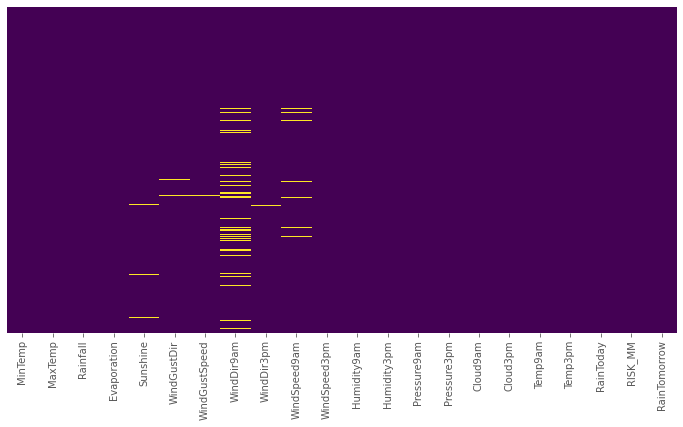

In [11]:
resizeplot()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Data Preprocessing & detele nulls

In [12]:
from sklearn.impute import KNNImputer

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imputer_int = KNNImputer(missing_values=np.nan)

In [15]:
df['Sunshine'] = imputer_int.fit_transform(df[['Sunshine']])

In [16]:
imputer_str = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [17]:
df['WindGustDir'] = imputer_str.fit_transform(df[['WindGustDir']])

In [18]:
df['WindGustSpeed'] = imputer_int.fit_transform(df[['WindGustSpeed']])

In [19]:
df['WindDir9am'] = imputer_str.fit_transform(df[['WindDir9am']])

In [20]:
df['WindDir3pm'] = imputer_str.fit_transform(df[['WindDir3pm']])

In [21]:
df['WindSpeed9am'] = imputer_int.fit_transform(df[['WindSpeed9am']])

<AxesSubplot:>

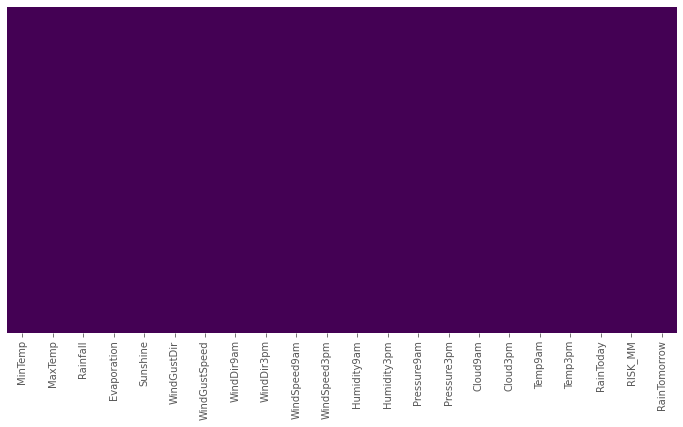

In [22]:
resizeplot()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [24]:
df.drop('RISK_MM', inplace=True,axis=1)

In [25]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,68,29,1019.7,1015.0,7,7,14.4,23.6,No,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,No


In [26]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# Correlation Between Data

<AxesSubplot:>

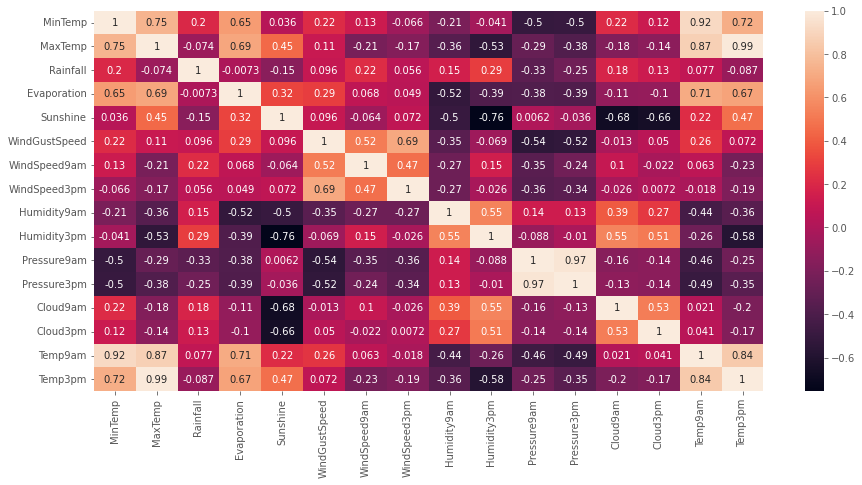

In [27]:
resizecorr()
sns.heatmap(df.corr(),annot=True)

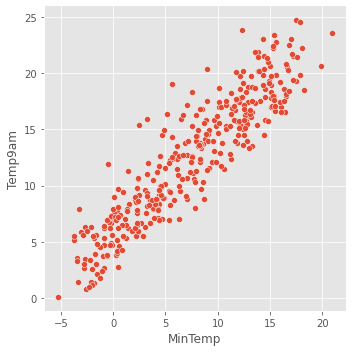

In [28]:
sns.relplot(x='MinTemp',y='Temp9am',data=df)

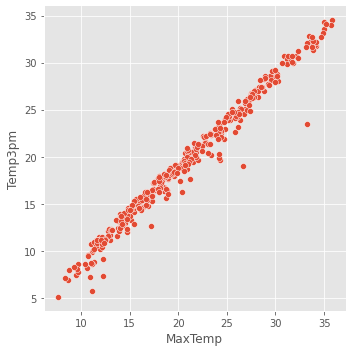

In [29]:
sns.relplot(x='MaxTemp',y='Temp3pm',data=df)

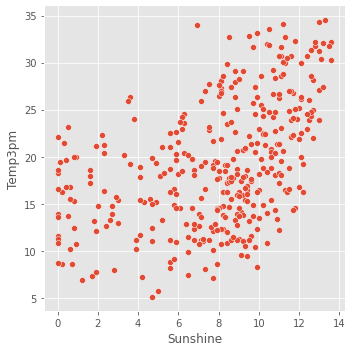

In [30]:
sns.relplot(x='Sunshine',y='Temp3pm',data=df)

C:\Users\Ahmed Zein\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ahmed Zein\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Density'>

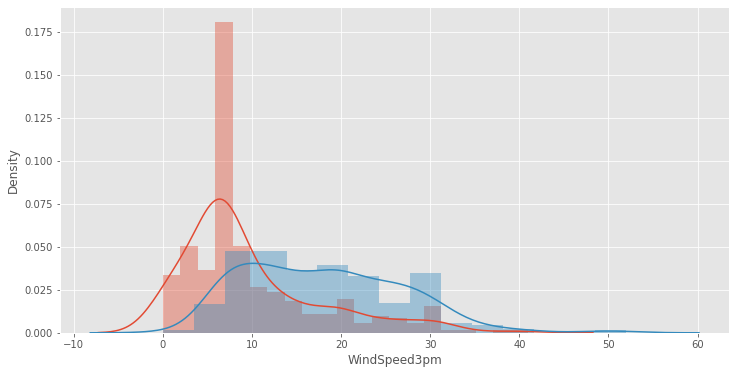

In [31]:
resizeplot()
sns.distplot(df['WindSpeed9am'])
sns.distplot(df['WindSpeed3pm'])

C:\Users\Ahmed Zein\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ahmed Zein\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

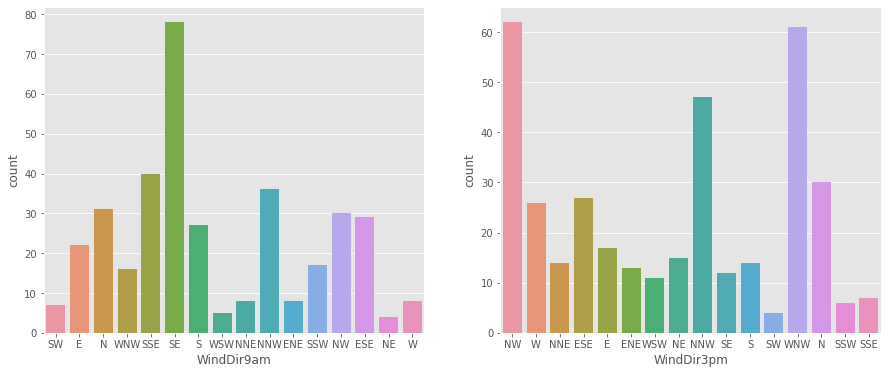

In [32]:
fig, ax =plt.subplots(1,2,figsize= (15,6))
sns.countplot(df['WindDir9am'],ax=ax[0])
sns.countplot(df['WindDir3pm'],ax=ax[1])

C:\Users\Ahmed Zein\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity3pm', ylabel='Evaporation'>

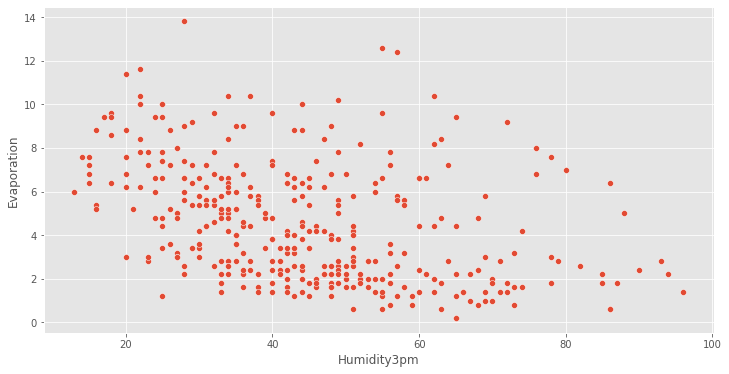

In [33]:
resizeplot()
sns.scatterplot(df['Humidity3pm'],df['Evaporation'])

C:\Users\Ahmed Zein\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ahmed Zein\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pressure3pm', ylabel='Density'>

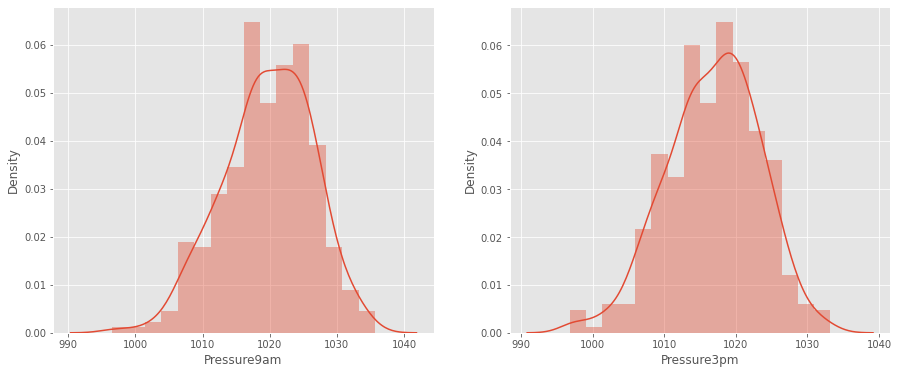

In [34]:
fig, ax =plt.subplots(1,2,figsize= (15,6))
sns.distplot(df['Pressure9am'],ax=ax[0])
sns.distplot(df['Pressure3pm'],ax=ax[1])

<AxesSubplot:xlabel='Pressure3pm', ylabel='MaxTemp'>

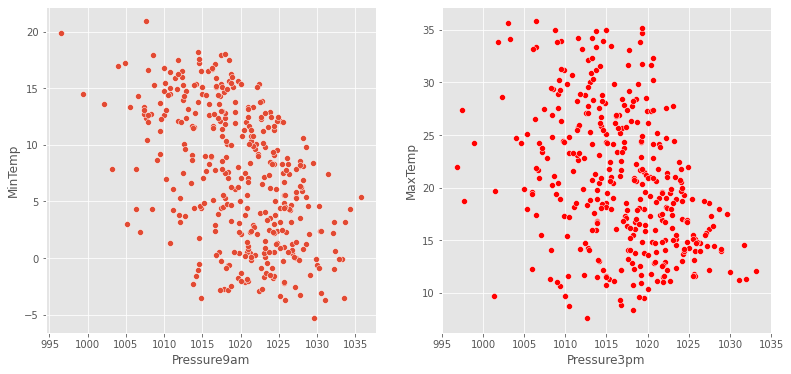

In [35]:
fig, ax =plt.subplots(1,2,figsize= (13,6))
sns.scatterplot(data=df,x='Pressure9am',y='MinTemp',ax=ax[0])
sns.scatterplot(data=df,x='Pressure3pm',y='MaxTemp',ax=ax[1],color='red')

C:\Users\Ahmed Zein\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ahmed Zein\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cloud3pm', ylabel='Density'>

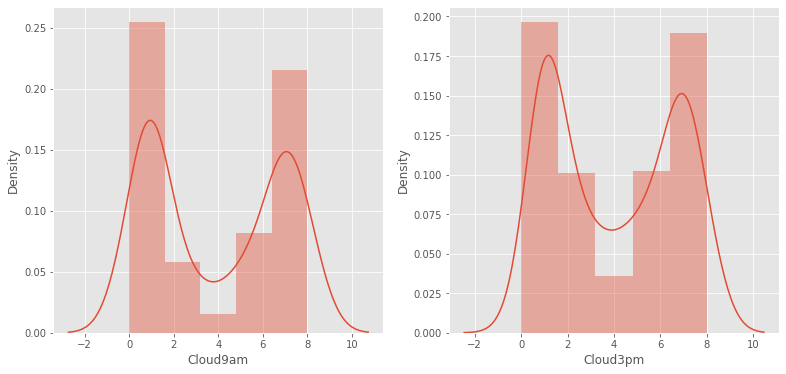

In [36]:
fig, ax =plt.subplots(1,2,figsize= (13,6))
sns.distplot(df['Cloud9am'],ax=ax[0])
sns.distplot(df['Cloud3pm'],ax=ax[1])

<AxesSubplot:xlabel='Cloud3pm', ylabel='Humidity3pm'>

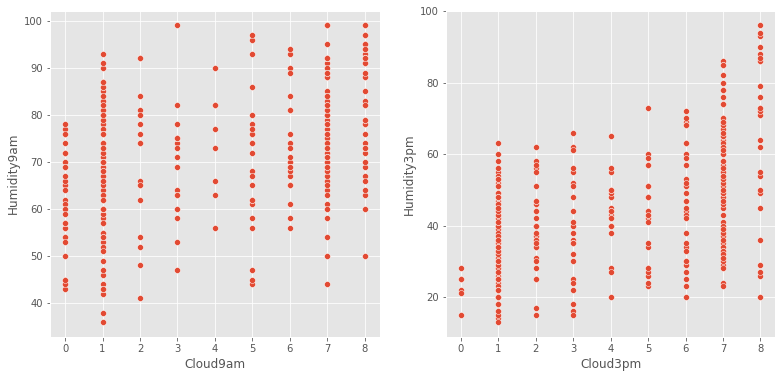

In [37]:
fig, ax =plt.subplots(1,2,figsize= (13,6))
sns.scatterplot(data=df, x='Cloud9am',y='Humidity9am',ax=ax[0])
sns.scatterplot(data=df,x='Cloud3pm',y='Humidity3pm',ax=ax[1])

In [38]:
df[['Rainfall','Sunshine','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
    'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am',
    'Temp3pm']].groupby(df['RainToday']).mean()

,Rainfall,Sunshine,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
RainToday,,,,,,,,,,,,,,
No,0.056667,8.179729,4.562667,38.682271,8.683036,17.640000,70.783333,41.996667,1020.812000,1017.658667,3.593333,3.906667,12.126333,19.456000
Yes,7.663636,6.680445,4.336364,45.106061,14.055330,19.560606,77.727273,55.984848,1014.695455,1012.954545,5.242424,4.560606,13.413636,18.207576


In [39]:
from sklearn.preprocessing import LabelBinarizer

In [40]:
LB = LabelBinarizer()

In [41]:
df['WindGustDir'] = LB.fit_transform(df[['WindGustDir']])

In [42]:
df['WindDir9am'] = LB.fit_transform(df[['WindDir9am']])

In [43]:
df['WindDir3pm'] = LB.fit_transform(df[['WindDir3pm']])

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
LE = LabelEncoder()

In [46]:
df['RainToday'] = LE.fit_transform(df['RainToday'])

In [47]:
df['RainTomorrow'] = LE.fit_transform(df['RainTomorrow'])

In [48]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,0,30.0,0,0,6.0,...,68,29,1019.7,1015.0,7,7,14.4,23.6,0,1
1,14.0,26.9,3.6,4.4,9.7,0,39.0,1,0,4.0,...,80,36,1012.4,1008.4,5,3,17.5,25.7,1,1
2,13.7,23.4,3.6,5.8,3.3,0,85.0,0,0,6.0,...,82,69,1009.5,1007.2,8,7,15.4,20.2,1,1
3,13.3,15.5,39.8,7.2,9.1,0,54.0,0,0,30.0,...,62,56,1005.5,1007.0,2,7,13.5,14.1,1,1
4,7.6,16.1,2.8,5.6,10.6,0,50.0,0,0,20.0,...,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from  sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Spilitng Data Train and Test

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = df.drop('RainTomorrow',axis=1).values
y = df['RainTomorrow'].values

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
minmax = MinMaxScaler()

In [54]:
X = minmax.fit_transform(X)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Cross Validation 

In [83]:
def cross_val(x,y,model,name):
    scores = cross_val_score(model, X, y,
                              cv=5,
                              scoring='accuracy')

    print(f"accuracy:{name}", scores)

In [84]:
cross_val(X,y,DecisionTreeClassifier(),"DecisionTree")
cross_val(X,y,KNeighborsClassifier(),"KNeighbors")
cross_val(X,y,LogisticRegression(),"Logistic")
cross_val(X,y,SVC(),"SVC")

accuracy:DecisionTree [0.64864865 0.7260274  0.67123288 0.69863014 0.83561644]
accuracy:KNeighbors [0.82432432 0.83561644 0.8630137  0.84931507 0.82191781]
accuracy:Logistic [0.81081081 0.8630137  0.90410959 0.84931507 0.8630137 ]
accuracy:SVC [0.83783784 0.84931507 0.90410959 0.84931507 0.8630137 ]


# DecisionTree

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dtree = DecisionTreeClassifier()

In [58]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
previsor_dtree = dtree.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [61]:
print(classification_report(y_test,previsor_dtree))
print(confusion_matrix(y_test,previsor_dtree))
print('\n')
print('Accuracy:',np.round(accuracy_score(y_test,previsor_dtree),3)*100,'%')

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       100
           1       0.44      0.33      0.38        21

    accuracy                           0.81       121
   macro avg       0.65      0.62      0.63       121
weighted avg       0.79      0.81      0.80       121

[[91  9]
 [14  7]]


Accuracy: 81.0 %


# SVC

In [62]:
from sklearn.svm import SVC

In [63]:
model = SVC(kernel='rbf',degree=3,gamma='scale')

In [64]:
model.fit(X_train, y_train)

SVC()

In [65]:
previsor_svc = model.predict(X_test)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(classification_report(y_test,previsor_svc))
print(confusion_matrix(y_test,previsor_svc))
print('\n')
print('Acurracy:',np.round(accuracy_score(y_test,previsor_svc),3)*100,'%')

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       100
           1       0.75      0.29      0.41        21

    accuracy                           0.86       121
   macro avg       0.81      0.63      0.67       121
weighted avg       0.85      0.86      0.83       121

[[98  2]
 [15  6]]


Acurracy: 86.0 %


In [68]:
from  sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# KNN

In [72]:
parameters = {'n_neighbors':[5,6,7,8,9], 'p':[1,2,4,6,5,3,7],
              }
knn=KNeighborsClassifier()
gs= GridSearchCV(knn, parameters,cv=5)
gs.fit(X_train, y_train)
      
print("DecisionTreeClassifier Parameters: {}".format(gs.best_params_))
print("Best score is {}".format(gs.best_score_))

DecisionTreeClassifier Parameters: {'n_neighbors': 9, 'p': 7}
Best score is 0.8326530612244898


# LogisticRegression

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
LR = LogisticRegression(penalty='l2',fit_intercept=True, C=1.0)

In [75]:
LR.fit(X_train,y_train)

LogisticRegression()

In [76]:
predict_LR = LR.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [78]:
print(classification_report(y_test,predict_LR))
print(confusion_matrix(y_test,predict_LR))
print('\n')
print('Acurracy :', np.round(accuracy_score(y_test,predict_LR),3)*100,'%')

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       100
           1       0.64      0.33      0.44        21

    accuracy                           0.85       121
   macro avg       0.75      0.65      0.68       121
weighted avg       0.83      0.85      0.83       121

[[96  4]
 [14  7]]


Acurracy : 85.1 %


In [79]:
LR = np.round(accuracy_score(y_test,predict_LR),3) *100
knn = np.round(accuracy_score(y_test,y_pred),3) *100
svc = np.round(accuracy_score(y_test,previsor_svc),3)*100
dtree = np.round(accuracy_score(y_test,previsor_dtree),3)*100

# Accuracy

In [80]:
print('Accuracy_Decision_tree: ',dtree,'%')
print('Accuracy_knn: ',knn,'%')
print('Accuracy_LR: ', LR,'%')
print('AccuracyaA_SVC: ', svc,'%')

Accuracy_Decision_tree:  81.0 %
Accuracy_knn:  82.6 %
Accuracy_LR:  85.1 %
AccuracyaA_SVC:  86.0 %
